**DINAMICA DI UN POLIMERO SEMI-FLESSIBILE**

INTRODUZIONE:


Quando si parla di dinamica di un filamento di DNA sintetico ci si riferisce al modo in cui questo filamento si comporta e interagisce con il suo ambiente. Ci riferiamo principalmente a due aspetti principali:


*   Struttura e Conformazione: il DNA sintetico, come quello naturale, può assumere diverse conformazioni e strutture a seconda delle condizioni ambientali e delle interazioni molecolari.
*   Interazioni molecolari: il DNA sintetico può interagire con altre molecole biologiche e con l'ambiente circostante. Queste interazioni sono cruciali per la regolazione dell'espressione genica e per altri processi biologici in cui il DNA è coinvolto.

Le varie strutture che il DNA può assumere sono essenziali per le sue funzioni biologiche. Queste strutture non solo influenzano la stabilità e l'accessibilità del DNA, ma sono anche cruciali per l'interazione con altre molecole biologiche, contribuendo a processi come la replicazione, la trascrizione e la riparazione del DNA. La comprensione di queste dinamiche è fondamentale in molti campi della ricerca biologica e medica.

Vogliamo qui studiare le diverse strutture che un filamento può assumere.

SIMULAZIONE DELLA WORM-LIKE-CHAIN

Una worm-like-chain (WLC) è un modello che descrive un polimero semi-flessibile, diviso in segmenti successivi la cui direzione dipende da due parametri, gli angoli polari $(\phi, θ)$, che poi vedremo come vengono scelti nel codice, e caratterizzata da una lunghezza di persistenza $l_p$, cioè la lunghezza su cui la direzione della catena si mantiene correlata (rigida). Qui simuliamo una WLC, che sarà il punto di partenza per le considerazioni successive.

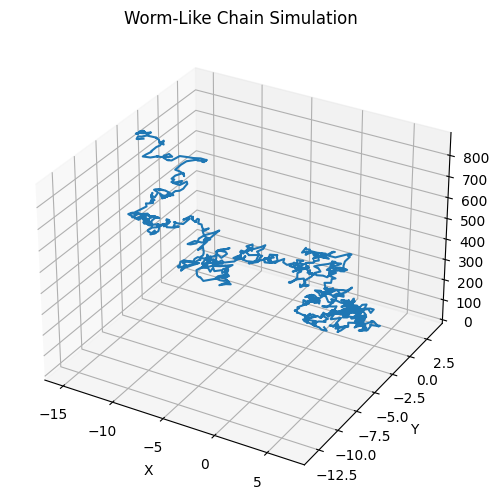

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri del modello WLC
N = 1000  # Numero di segmenti in cui divido la catena
b = 1.0   # Lunghezza di ogni segmento
lp = 10.0 # Lunghezza di persistenza
delta_theta = np.sqrt(2 * b / lp)  # Delta(theta) rappresenta una misura della flessibilità della catena e viene utilizzato per determinare la distribuzione degli angoli di direzione (theta) nella generazione della catena (Laurence et al.).

# Funzione per la distribuzione P(theta) ~ theta * exp[-(theta/delta_theta)^2]
def P_theta(theta, delta_theta):
    return theta * np.exp(-(theta / delta_theta) ** 2) # Questa distribuzione è proporzionale a theta, il che significa che gli angoli più piccoli (indicando una direzione più simile al segmento precedente) sono più probabili rispetto agli angoli più grandi (che indicano una direzione più differente).

# Funzione per generare theta con metodo di accettazione-rifiuto (stabilisco un valore massimo della distribuzione di probabilità, così da poter generare valori casuali e decidere se accettarli o meno)
def generate_theta(delta_theta, size=1): # Impostando size=1, si indica che si desidera generare un singolo valore di angolo theta
    thetas = []
    max_prob = P_theta(np.sqrt(2) * delta_theta, delta_theta)  # Massimo della funzione P(theta)
# np.sqrt(2) * delta_theta viene utilizzato perché è ragionevolmente vicino al massimo della funzione, utilizzare questo valore assicura che il campione casuale di angoli generato possa avere una probabilità di accettazione sufficientemente alta, ottimizzando così l'efficienza del campionamento.


    while len(thetas) < size: # Genero un angolo alla volta
        # Generazione casuale di theta tra 0 e pi
        theta_trial = np.random.uniform(0, np.pi)

        # Probabilità per accettazione-rifiuto
        prob = P_theta(theta_trial, delta_theta)

        # Accettazione-rifiuto (Questo assicura che si generi un campione di angoli theta che segue la distribuzione prevista, rispettando la forma della funzione di probabilità definita)
        if np.random.uniform(0, max_prob) < prob:
            thetas.append(theta_trial)

    return np.array(thetas)

# Funzione per generare phi uniformemente distribuito in [0, 2*pi]
def generate_phi(size=1):
    return np.random.uniform(0, 2 * np.pi, size)

# Funzione per generare la Worm-like-chain
def generate_wlc(N, b, delta_theta):
    # Posizione iniziale della catena
    positions = np.zeros((N+1, 3))  # (x, y, z)

    # Angoli iniziali
    theta = generate_theta(delta_theta, 1)[0] #Richiamo la funzione generate_theta e prendo il primo valore unico
    phi = generate_phi(1)[0]

    # Vettore di direzione iniziale (coordinate sferiche)
    direction = np.array([np.sin(theta) * np.cos(phi),
                          np.sin(theta) * np.sin(phi),
                          np.cos(theta)])

    for i in range(1, N+1):
        # Generiamo i nuovi angoli theta e phi
        theta = generate_theta(delta_theta, 1)[0]
        phi = generate_phi(1)[0]

        # Aggiorniamo la direzione del segmento attuale
        direction = np.array([np.sin(theta) * np.cos(phi),
                              np.sin(theta) * np.sin(phi),
                              np.cos(theta)])

        # Aggiorniamo la posizione
        positions[i] = positions[i-1] + b * direction

    return positions

# Genera la Worm-like-chain
positions = generate_wlc(N, b, delta_theta)

# Plot della Worm-like-chain nello spazio 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], lw=1.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Worm-Like Chain Simulation')
plt.show()
